In [43]:
# importing required packages

# time for calculating running times of the classifiers
import time

# numpy for handling arrays
import numpy as np

# pandas for working with huge data
import pandas as pd

# SMOTE for over sampling
from imblearn.over_sampling import SMOTE

# DecisionTreeClassifier for classification using decision tree
from sklearn.tree import DecisionTreeClassifier

# test_train_split for splitting the data
from sklearn.model_selection import train_test_split 

# Perceptron for classification using neural network unit
from sklearn.linear_model import Perceptron

# PCA for dimensionality reduction
from sklearn.decomposition import PCA

In [44]:
# setting the number of features as 100000 as we have those many number of features in the given traing dataset
num_features = 100000

# function to plot the data at the give feature value, making a mapping table or matrix we can say
def to_tabular_data(file_passed):

    # creating a data frame with columns with range 100000
    mapping_table = pd.DataFrame(columns=range(num_features))
    
    # for loop to plot the values at given feature index
    for i in range(len(file_passed)):

        # forming an array for each line in file_passed
        line_array = np.fromstring(file_passed[i], dtype=int, sep=' ')

        # forming a table with values 0 for 100000 columns
        feature_matrix = [0] * num_features
        
        # plotting the value at the index of each feature value
        for attribute in line_array:
            feature_matrix[attribute-1] = 1
        mapping_table.loc[i] = feature_matrix
            
    return mapping_table 

In [45]:
# function to get the training data labels
def get_train_labels(file_passed):

    #creating an empty list called labels
    labels=[]

    # using file handle object to open text file containg training data and opening it in read mode
    f1 = open(file_passed, "r")

    # reading the lines in the text file using readlines() method
    gathered_data = f1.readlines()
    
    # appening the first value of each and evry line in all lines read above as those are the labels
    for line in gathered_data:
        labels.append(line[0])
        
    # after done with using the file we close the file handle
    f1.close()
    return labels

In [46]:
# function to get the training data features
def get_train_features(file_passed):

    #creating an empty list called features to store feature values
    features=[]

    # using file handle object to open text file containg training data and opening it in read mode
    f2 = open(file_passed, "r")

    # reading the lines in the text file using readlines() method
    gathered_data = f2.readlines()
    
    for line in gathered_data:

        # for each and evry line in all lines in text file we clear/replace the '0\t', '1\t' and '\n' as those are labels and escape characters to have only feature data in file
        line=line.replace("0\t","")
        line=line.replace("1\t","")
        line=line.replace("\n","")
        features.append(line)

    # closing the file handle after we are done
    f2.close()
    
    # calling the to_tabular_data function to map the feature values
    matrix_feature_data = to_tabular_data(features)
    return matrix_feature_data

In [47]:
# function to get test features, this test data set has no class labels
def get_test_features(file_passed):

    #creating an empty list called features to store feature values
    features=[]

    # using file handle object to open text file containg training data and opening it in read mode
    f2 = open(file_passed, "r")

    # reading the lines in the text file using readlines() method
    gathered_data = f2.readlines()

    for line in gathered_data:

        # for each and evry line in all lines in text file we clear/replace the '\n' as those are escape characters to have only feature data in file
        line=line.replace("\n","")
        features.append(line)

    # closing the file handle after we are done
    f2.close()
    
    # calling the to_tabular_data function to map the feature values
    matrix_feature_data = to_tabular_data(features)
    return matrix_feature_data

In [48]:
# function to perform dimensionality reduction on the training data and test data
def perform_pca_on_data(x_train, x_test, test_feat_passed, no_of_components):

    # creating the TruncatedSVD object called dimension_reduction
    dimension_reduction = PCA(n_components = no_of_components)

    # using the above created object to perform fit_transform on the X_train data
    red_x_train_data = dimension_reduction.fit_transform(x_train)

    # using the above created object to perform transform on the X_test data
    red_x_test_data = dimension_reduction.transform(x_test)

    # using the above created object to perform transform on the testing dataset feature data
    red_test_data = dimension_reduction.transform(test_feat_passed)
    
    # returning the dimensionality reduced variables
    return red_x_train_data, red_x_test_data, red_test_data

In [49]:
# storing the file training dataset filepath into a variable
train_filepath = "train.txt"

# storing the file testing dataset filepath into a variable
test_filepath = "test.txt"

# function to get the labels and converting it into numpy array
train_lab = np.asarray(get_train_labels(train_filepath))

# function to get the training features
train_feat = get_train_features(train_filepath)

# function to get the testing features
test_feat = get_test_features(test_filepath)

# splitting the test data after cleaning, took a 80/20 split ratio here
X_train, X_test, y_train, y_test = train_test_split(train_feat, train_lab, test_size=0.2, random_state=42)



In [50]:
# calling a function to reduce the dimensionality of the traing data into values of 500 for quick execution
reduced_x_train, reduced_x_test, reduced_test_ft = perform_pca_on_data(X_train, X_test, test_feat, 500)

In [51]:
# SMOTE is most common method used to oversample the data when we get imbalanced data
# initializing a sampling object
oversampling = SMOTE()

# using the sampling object to re-sample the data which we get after dimensionality reduction
oversampled_train_features, oversampled_train_labels = oversampling.fit_resample(reduced_x_train, y_train)


In [52]:
# Only for training data
# testing two classifiers to experiment on them
# 1. Neural Network (Perceptron)
# 2. Decision Tree Classifier

# creating a perceptron object, it is a neural network unit helps to classify data
n_network = Perceptron()

# initializing a time object
s1= time.time()

# calling fit method using the classifier object and calculating time for training
n_network.fit(oversampled_train_features, oversampled_train_labels)
e1 = time.time()
print("\n Neural network (perceptron) training time:", round(e1-s1, 3), "s")

# creating empty list to store all the predicted values
n_network_preds_train = []

# initializing a time object
s2 = time.time()

# calling the predict function and storing the values in the list created above
n_network_preds_train = n_network.predict(reduced_x_test)
e2 = time.time()
print("\n Neural network (perceptron) predicting time:", round(e2-s2, 3), "s")


# creating a decision tree object, it is a decision tree classifier unit helps to classify data
dtclf = DecisionTreeClassifier()

# initializing a time object
s3=time.time()

# calling fit method using the classifier object
dtclf.fit(oversampled_train_features, oversampled_train_labels)
e3=time.time()
print("\n Decision tree training time:", round(e3-s3, 3), "s")

# creating empty list to store all the predicted values
dtclf_preds_train = []

# initializing a time object
s4=time.time()

# calling the predict function and storing the values in the list created above
dtclf_preds_train = dtclf.predict(reduced_x_test)
e4=time.time()
print("\n Decision tree predicting time:", round(e4-s4, 3), "s")


 Neural network (perceptron) training time: 0.02 s

 Neural network (perceptron) predicting time: 0.003 s

 Decision tree training time: 0.461 s

 Decision tree predicting time: 0.001 s


In [53]:
# importing classification_report from sklearn to get all F1-score, recall-values and precision values
from sklearn.metrics import classification_report

# naming the class labels as class 0 and class 1 for printing in classification report
label_names = ['class 0', 'class 1']

# printing classification report for Neural Network
print("\tPerceptron (Neural Network):\n")
print(classification_report(n_network_preds_train,y_test, target_names=label_names))

# printing classification report for Decision tree
print("\tDecision Tree:\n")
print(classification_report(dtclf_preds_train,y_test, target_names=label_names))


	Perceptron (Neural Network):

              precision    recall  f1-score   support

     class 0       1.00      0.94      0.97       156
     class 1       0.29      1.00      0.44         4

    accuracy                           0.94       160
   macro avg       0.64      0.97      0.71       160
weighted avg       0.98      0.94      0.95       160

	Decision Tree:

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.97       144
     class 1       0.71      0.62      0.67        16

    accuracy                           0.94       160
   macro avg       0.84      0.80      0.82       160
weighted avg       0.93      0.94      0.94       160



In [54]:
# Only for testing data
# testing two classifiers to experiment on them
# 1. Neural Network (Perceptron)
# 2. Decision Tree Classifier

# creating empty list store predictions given by perceptron (Neural Network) for test data
n_network_preds_test = []

s5=time.time()
# predicting values
n_network_preds_test = n_network.predict(reduced_test_ft)
e5=time.time()
print("\n Neural network (Perceptron) test data prediction time:", round(e5-s5, 3), "s")

# creating empty list store predictions given by Decision tree for test data
dtclf_preds_test = []

s6=time.time()
# predicting values
dtclf_preds_test = dtclf.predict(reduced_test_ft)
e6=time.time()
print("\n Decision tree test data prediction time:", round(e6-s6, 3), "s")


 Neural network (Perceptron) test data prediction time: 0.002 s

 Decision tree test data prediction time: 0.001 s


In [55]:
# code to print all the predictions obtained above into a text file

# opening a file using file object to print predictions made by Neural Network
file = open("neural_network.txt", "w")

# using for loop to loop through prediction values
for pred in n_network_preds_test:
    file.write(str(pred)+"\n")

# closing file object after pritning
file.close()

# opening a file using file object to print predictions made by Decision trees
file = open("decision_tree.txt", "w")

# using for loop to loop through prediction values
for pred in dtclf_preds_test:
    file.write(str(pred)+"\n")

# closing file object after pritning
file.close()

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0875,
  0.08125,
  0.05625,
  0.0625,
  0.05625,
  0.0625,
  0.0625,
  0.0625,
  0.05625,
  0.0625])

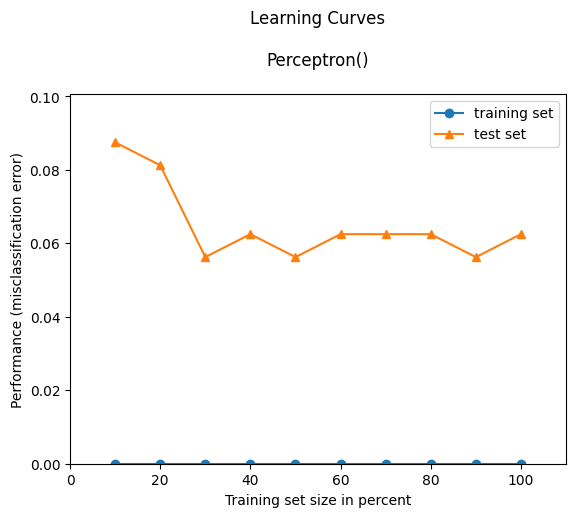

In [56]:
# importing plot learning curves
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves for neural network (perceptron)
plot_learning_curves(oversampled_train_features, oversampled_train_labels, reduced_x_test, y_test, n_network)

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.08125,
  0.0875,
  0.075,
  0.0625,
  0.0625,
  0.0625,
  0.05625,
  0.05625,
  0.05,
  0.05625])

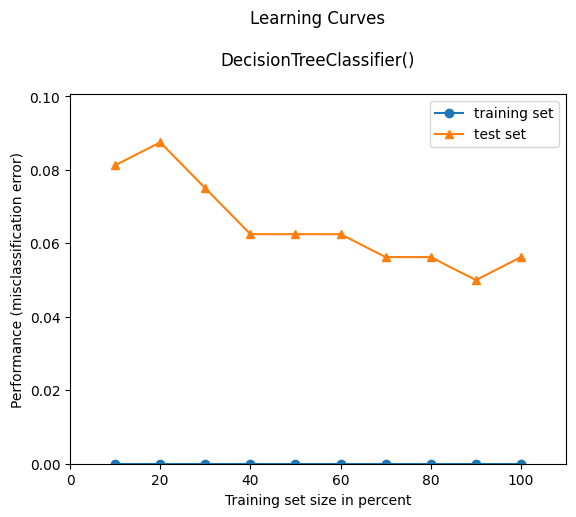

In [57]:
# # Plot the learning curves for Decision Tree Classifier
plot_learning_curves(oversampled_train_features, oversampled_train_labels, reduced_x_test, y_test, dtclf)